In [1]:
# import necessary modules
# uncomment to get plots displayed in notebook
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from classy import Class
from scipy.optimize import fsolve
from math import pi

In [2]:
# esthetic definitions for the plots
font = {'size'   : 16, 'family':'STIXGeneral'}
axislabelfontsize='large'
matplotlib.rc('font', **font)
matplotlib.mathtext.rcParams['legend.fontsize']='medium'
plt.rcParams["figure.figsize"] = [8.0,6.0]

 * Compute with DM_annihilation_efficiency=0.000000e+00
 * Compute with DM_annihilation_efficiency=2.775000e-23
 * Compute with DM_annihilation_efficiency=5.550000e-23
 * Compute with DM_annihilation_efficiency=8.325000e-23
 * Compute with DM_annihilation_efficiency=1.110000e-22


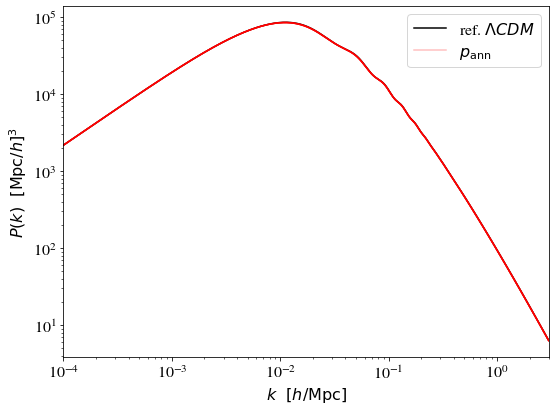

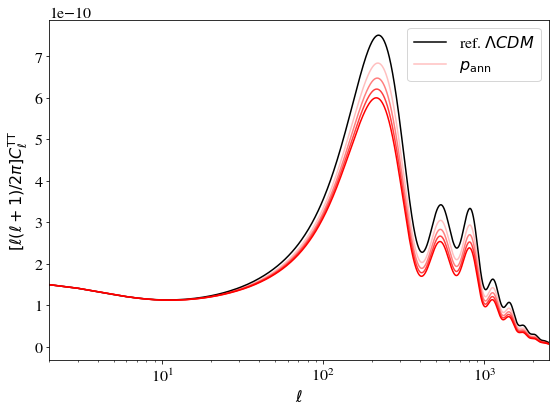

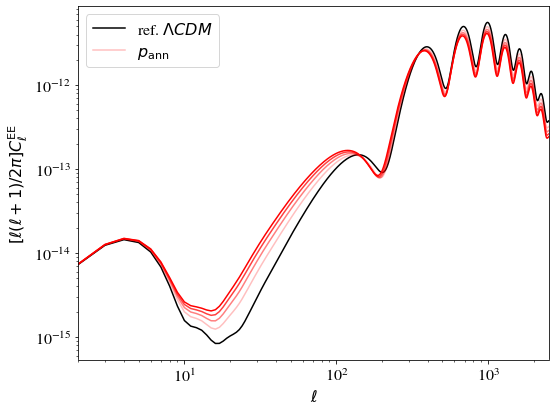

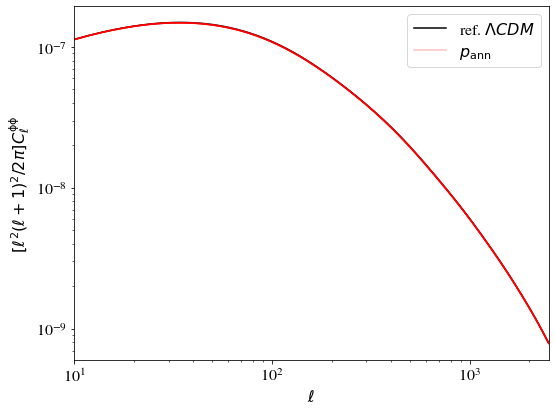

In [3]:
############################################
#
# Varying parameter (others fixed to default)
#
# With the input suntax of class <= 2.9 we used: annihilation = 1.e-5 m^3/s/Kg
# With the new syntax this is equivalent to DM_annihilation_efficiency = 1.11e-22 m^3/s/J
# (the ratio is a factor (c/[1 m/s])**2 = 9.e16)
#
var_name = 'DM_annihilation_efficiency'
var_array = np.linspace(0,1.11e-22,5)
var_num = len(var_array)
var_legend = r'$p_\mathrm{ann}$'
var_figname = 'pann'
#
#############################################
#
# Fixed settings
#
common_settings = {# LambdaCDM parameters
                   'h':0.67556,
                   'omega_b':0.022032,
                   'omega_cdm':0.12038,
                   'A_s':2.215e-9,
                   'n_s':0.9619,
                   'tau_reio':0.0925,
                   # output and precision parameters
                   'output':'tCl,pCl,lCl,mPk',
                   'lensing':'yes',
                   'P_k_max_1/Mpc':3.0,
                   'l_switch_limber':9
                   }
#
# arrays for output
#
kvec = np.logspace(-4,np.log10(3),1000)
legarray = []
twopi = 2.*pi
#
# Create figures
#
fig_Pk, ax_Pk = plt.subplots()
fig_TT, ax_TT = plt.subplots()
fig_EE, ax_EE = plt.subplots()
fig_PP, ax_PP = plt.subplots()
#
M = Class()
#
# loop over varying parameter values
#
for i,var in enumerate(var_array):
    #
    print (' * Compute with %s=%e'%(var_name,var))
    #
    # deal with colors and legends
    #
    if i == 0:
        var_color = 'k'
        var_alpha = 1.
        legarray.append(r'ref. $\Lambda CDM$')
    else:
        var_color = 'r'
        var_alpha = 1.*i/(var_num-1.)
    if i == var_num-1:
        legarray.append(var_legend)  
    #    
    # call CLASS
    #
    M.set(common_settings)
    M.set({var_name:var})
    M.compute()
    #
    # get Cls
    #
    clM = M.lensed_cl(2500)
    ll = clM['ell'][2:]
    clTT = clM['tt'][2:]
    clEE = clM['ee'][2:]
    clPP = clM['pp'][2:]
    #
    # get P(k) for common k values
    #
    pkM = []
    for k in kvec:
        pkM.append(M.pk(k,0.))
    #    
    # plot P(k)
    #
    ax_Pk.loglog(kvec,np.array(pkM),color=var_color,alpha=var_alpha,linestyle='-')
    #
    # plot C_l^TT
    #
    ax_TT.semilogx(ll,clTT*ll*(ll+1)/twopi,color=var_color,alpha=var_alpha,linestyle='-')
    #
    # plot Cl EE 
    #
    ax_EE.loglog(ll,clEE*ll*(ll+1)/twopi,color=var_color,alpha=var_alpha,linestyle='-')
    #
    # plot Cl phiphi
    #
    ax_PP.loglog(ll,clPP*ll*(ll+1)*ll*(ll+1)/twopi,color=var_color,alpha=var_alpha,linestyle='-')
    #
    # reset CLASS
    #
    M.empty()    
#
# output of P(k) figure
#
ax_Pk.set_xlim([1.e-4,3.])
ax_Pk.set_xlabel(r'$k \,\,\,\, [h/\mathrm{Mpc}]$')
ax_Pk.set_ylabel(r'$P(k) \,\,\,\, [\mathrm{Mpc}/h]^3$')
ax_Pk.legend(legarray)
fig_Pk.tight_layout()
fig_Pk.savefig('varying_%s_Pk.pdf' % var_figname)
#
# output of C_l^TT figure
#      
ax_TT.set_xlim([2,2500])
ax_TT.set_xlabel(r'$\ell$')
ax_TT.set_ylabel(r'$[\ell(\ell+1)/2\pi]  C_\ell^\mathrm{TT}$')
ax_TT.legend(legarray)
fig_TT.tight_layout()
fig_TT.savefig('varying_%s_cltt.pdf' % var_figname)
#
# output of C_l^EE figure
#    
ax_EE.set_xlim([2,2500])
ax_EE.set_xlabel(r'$\ell$')
ax_EE.set_ylabel(r'$[\ell(\ell+1)/2\pi]  C_\ell^\mathrm{EE}$')
ax_EE.legend(legarray)
fig_EE.tight_layout()
fig_EE.savefig('varying_%s_clee.pdf' % var_figname)
#
# output of C_l^pp figure
#   
ax_PP.set_xlim([10,2500])
ax_PP.set_xlabel(r'$\ell$')
ax_PP.set_ylabel(r'$[\ell^2(\ell+1)^2/2\pi]  C_\ell^\mathrm{\phi \phi}$')
ax_PP.legend(legarray)
fig_PP.tight_layout()
fig_PP.savefig('varying_%s_clpp.pdf' % var_figname)